# Urban greenery assesment


In [14]:
import geopandas as gpd

195
{2000, 2010}


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."


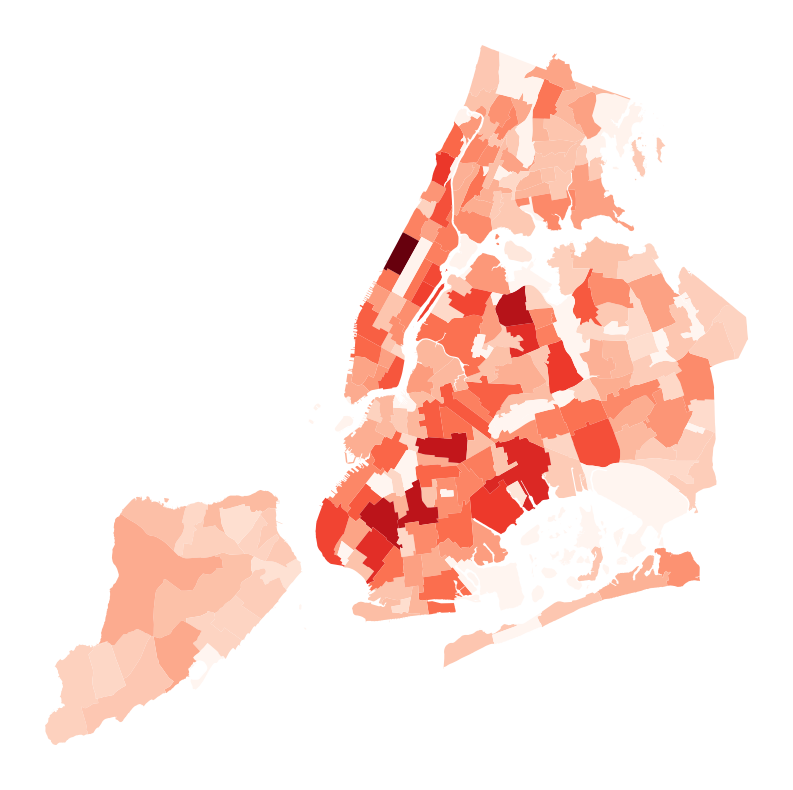

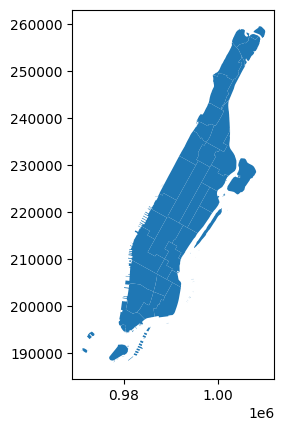

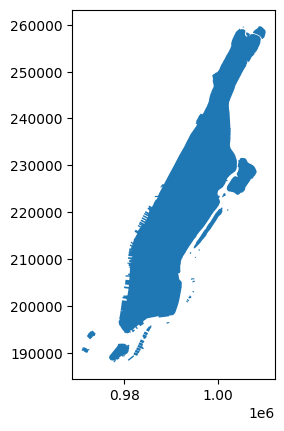

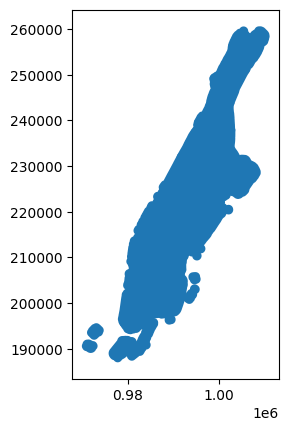

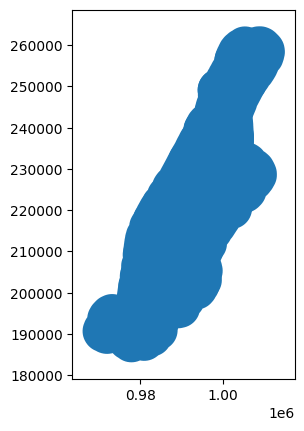

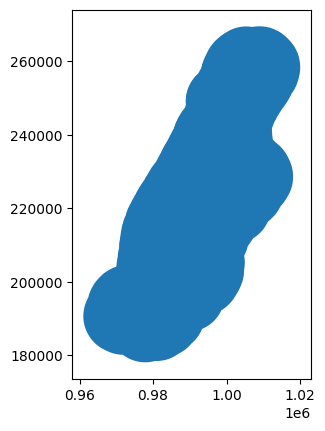

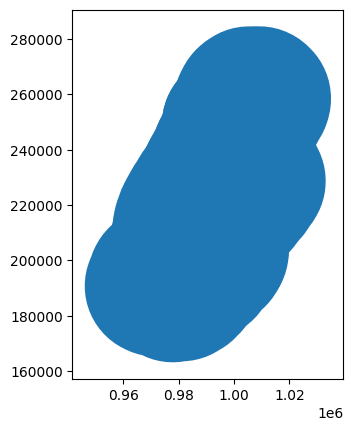

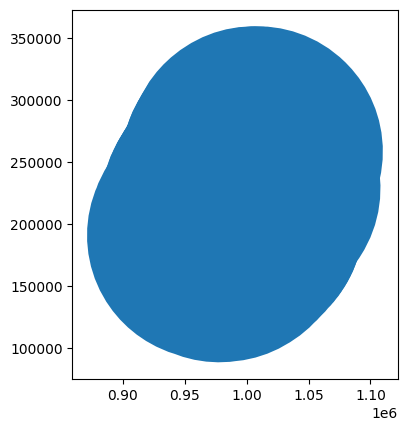

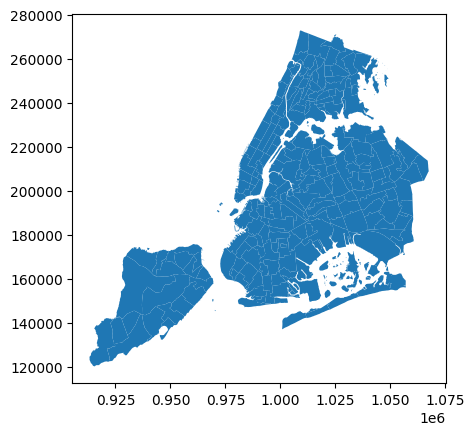

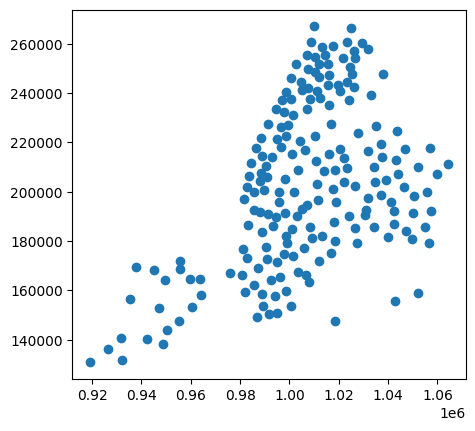

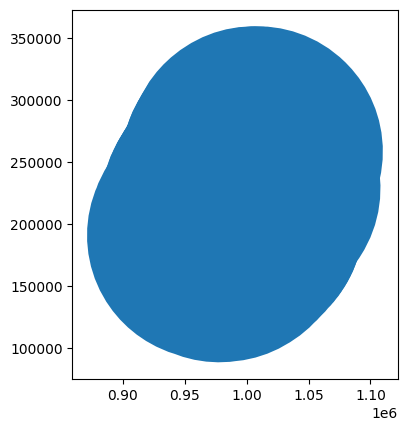

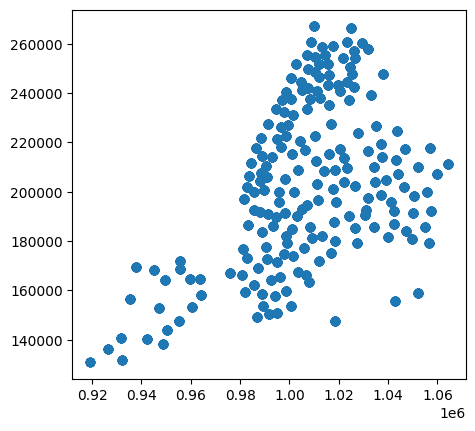

Manhattan population:  234058179
Buffer zone population:  302083724
Population ratio:  0.77
Zone size:  100  feet
Manhattan population:  1585873
Buffer zone population:  1641926
Population ratio:  0.97

Zone size:  1000  feet
Manhattan population:  1797507
Buffer zone population:  1966404
Population ratio:  0.91

Zone size:  5000  feet
Manhattan population:  11454568
Buffer zone population:  11432763
Population ratio:  1.0

Zone size:  10000  feet
Manhattan population:  24556715
Buffer zone population:  25297507
Population ratio:  0.97

Zone size:  25000  feet
Manhattan population:  71911298
Buffer zone population:  79238550
Population ratio:  0.91

Zone size:  100000  feet
Manhattan population:  234058179
Buffer zone population:  302083724
Population ratio:  0.77



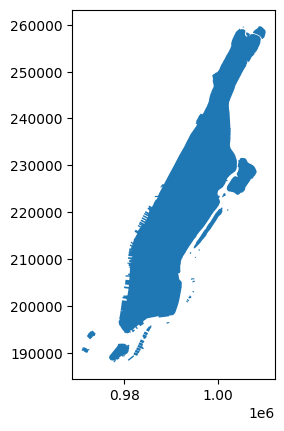

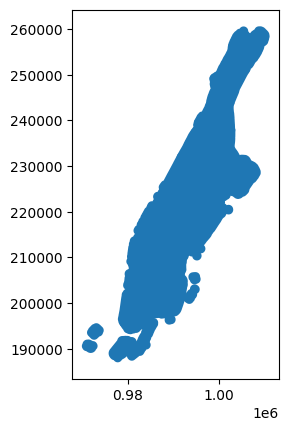

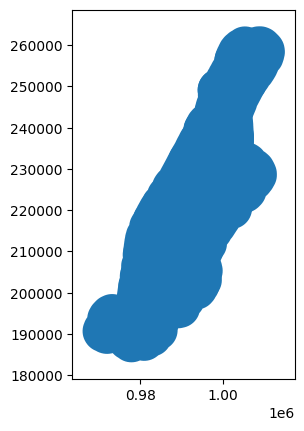

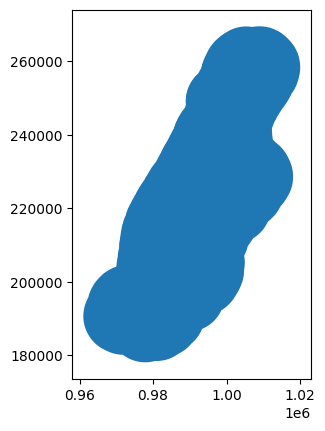

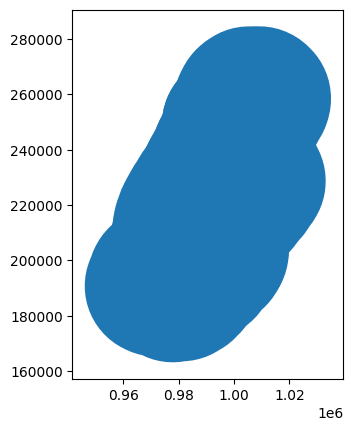

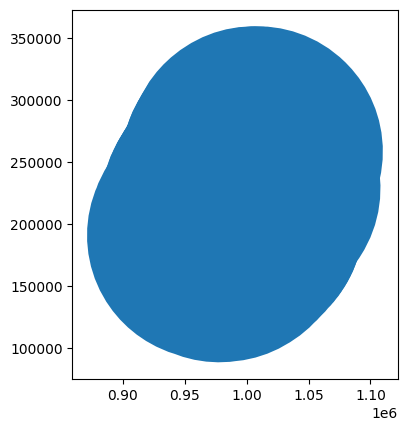

In [4]:
%run 04_05_local.ipynb
%run 04_06_local.ipynb

In [15]:
gdf_merged.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308...",Queens,2010,81,QN08,St. Albans,48593
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((1013128.551 250637.755, 101284...",Bronx,2010,5,BX41,Mount Hope,51807


In [16]:
gdf.head(3)

,tree_id,stump_diam,status,health,geometry
0,180683,0,Alive,Fair,POINT (-73.84422 40.72309)
1,200540,0,Alive,Fair,POINT (-73.81868 40.79411)
2,204026,0,Alive,Good,POINT (-73.93661 40.71758)


In [19]:
gdf = gdf.to_crs(2263)

In [20]:
gdf_join = gpd.sjoin(gdf_merged, gdf)
gdf_join.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,index_right,tree_id,stump_diam,status,health
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308...",Queens,2010,81,QN08,St. Albans,48593,3004,147003,0,Alive,Good
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308...",Queens,2010,81,QN08,St. Albans,48593,9227,146045,0,Alive,Fair
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308...",Queens,2010,81,QN08,St. Albans,48593,726,147009,0,Alive,Fair


In [21]:
gdf_join = gdf_join[['NTA Name', 'Population', 'tree_id', 'geometry']]
gdf_join.head(3)

,NTA Name,Population,tree_id,geometry
0,St. Albans,48593,147003,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."
0,St. Albans,48593,146045,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."
0,St. Albans,48593,147009,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."


In [22]:
gdf_grouped = gdf_join.groupby(by = 'NTA Name').nunique()[['tree_id']]
gdf_grouped = gdf_grouped.rename(columns = {'tree_id' : 'tree_count'})
gdf_grouped

,tree_count
NTA Name,
Allerton-Pelham Gardens,2
Annadale-Huguenot-Prince's Bay-Eltingville,100
Arden Heights,131
Astoria,184
Auburndale,13
...,...
Yorkville,90
park-cemetery-etc-Bronx,2
park-cemetery-etc-Brooklyn,34


In [23]:
gdf_join_tree = gdf_merged.merge(gdf_grouped, left_on = 'NTA Name', right_index = True)
gdf_join_tree.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,tree_count
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308...",Queens,2010,81,QN08,St. Albans,48593,16
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,13
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((1013128.551 250637.755, 101284...",Bronx,2010,5,BX41,Mount Hope,51807,126


In [24]:
gdf_join_tree['trees_per_capita'] = gdf_join_tree['tree_count'] / gdf_join_tree['Population']
gdf_join_tree = gdf_join_tree.sort_values(by = 'trees_per_capita', ascending = False)

In [25]:
gdf_join_tree[['NTA Name', 'tree_count', 'Population', 'trees_per_capita']].head(10)

,NTA Name,tree_count,Population,trees_per_capita
115,park-cemetery-etc-Brooklyn,34,418,0.081340
191,park-cemetery-etc-Manhattan,33,1849,0.017847
85,Oakwood-Oakwood Beach,286,22049,0.012971
77,Steinway,517,47534,0.010876
135,Kew Gardens,189,23278,0.008119
52,New Dorp-Midland Beach,155,21896,0.007079
60,Clinton Hill,202,34791,0.005806
178,Breezy Point-Belle Harbor-Rockwy Prk-Broad Chnl,153,28018,0.005461
89,Arden Heights,131,25238,0.005191
65,Ocean Parkway South,100,20299,0.004926


(np.float64(905464.73902893),
 np.float64(1075092.878585814),
 np.float64(112492.57379449514),
 np.float64(280480.09020685364))

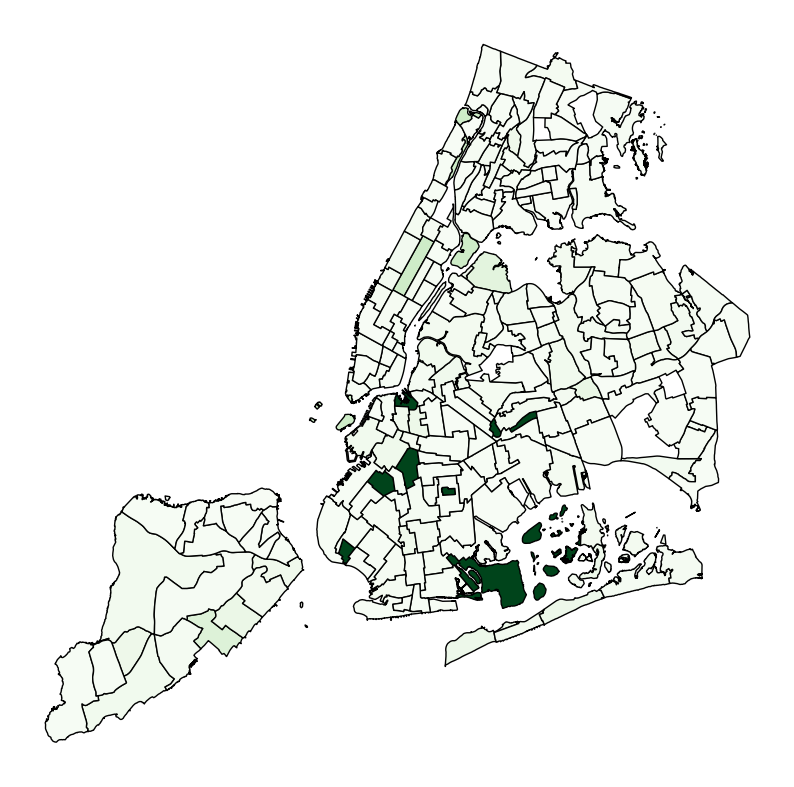

In [26]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(10,10))

gdf_join_tree.plot(ax=ax, column = 'trees_per_capita', cmap = 'Greens', edgecolor = 'k')

ax.axis('off')

(np.float64(905464.73902893),
 np.float64(1075092.878585814),
 np.float64(112492.57379449514),
 np.float64(280480.09020685364))

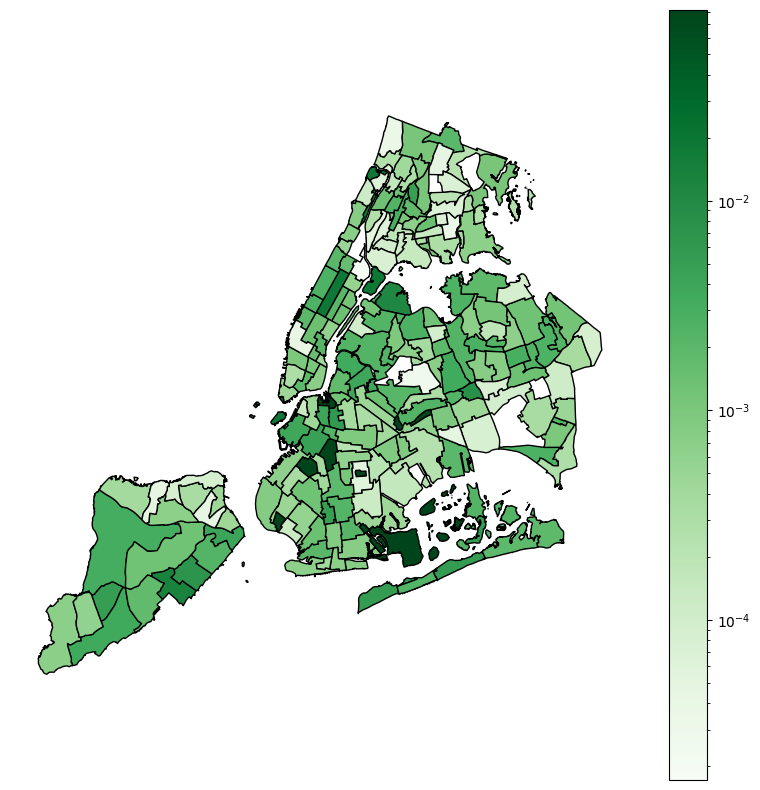

In [27]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin = gdf_join_tree['trees_per_capita'].min(), 
               vmax = gdf_join_tree['trees_per_capita'].max())


f, ax = plt.subplots(1,1,figsize=(10,10))

gdf_join_tree.plot(ax=ax, 
                   column = 'trees_per_capita', 
                   cmap = 'Greens', 
                   edgecolor = 'k',
                   norm = norm, 
                   legend = True)

ax.axis('off')